In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [36]:
def calc_income_per_month(rent, load):
    return rent_price_per_day*rent_load/100*30

In [37]:
def calc_car_residual_price(current_price, month_count, loss_rate):
    return round(current_price * (1-loss_rate/100)**(month_count/12))

In [49]:
def calc_rent_price(rent_price, month_count, loss_rate):
    return round(rent_price * (1-loss_rate/100)**(month_count / 12))

In [50]:
def calc_total_income(month_count):
    return calc_income_per_month(calc_rent_price(rent_price_per_day, month_count, 5), rent_load)*month_count+calc_car_residual_price(car_price, month_count, car_price_loss_rate_per_year)

In [39]:
def calc_total_cost(month_count):
    return (service_price+insurance_price) * ((month_count - 1) // 12 + 1) + car_price

In [40]:
def calc_percentage(month_count):
    total_income = calc_total_income(month_count)
    total_cost = calc_total_cost(month_count)
    return (total_income-total_cost)/total_cost*100/(month_count / 12)

In [85]:
max_month_value = 7*12
df = pd.DataFrame(
    {
        'month': list(range(1, max_month_value+1)),
        'total_cost': max_month_value*[0],
        'total_income': max_month_value*[0],
        'residual_price': max_month_value*[0],
        'rent_price': max_month_value*[0],
        'percentage': max_month_value*[0]
    }
)

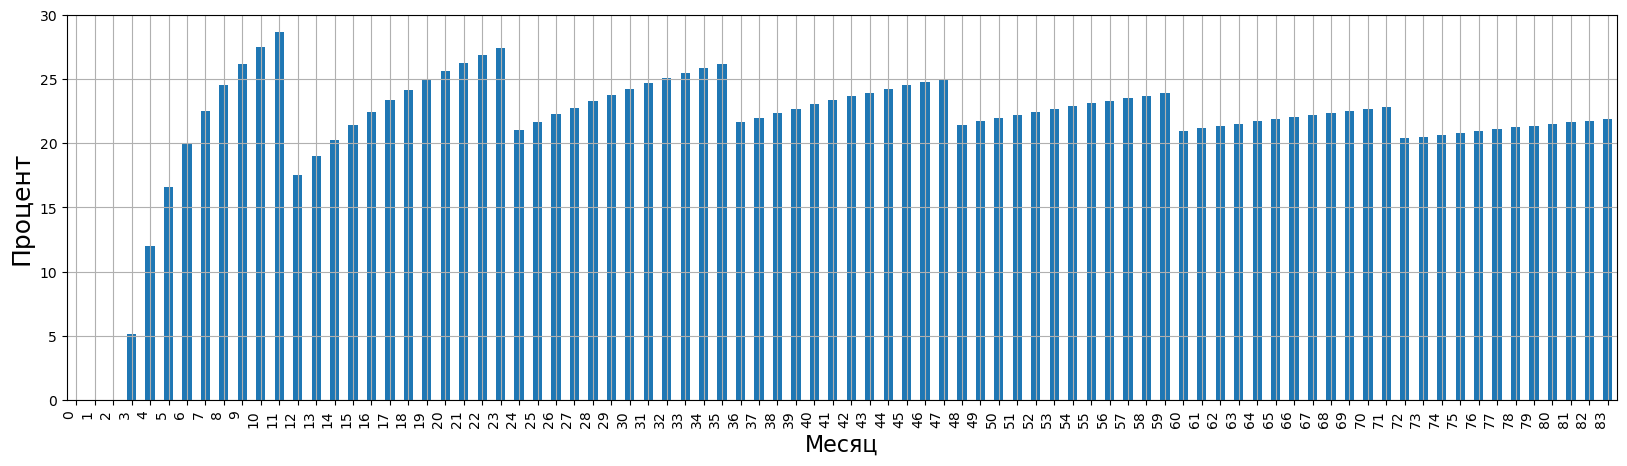

In [92]:
car_price = 1200000 # Стоимость машины
rent_price_per_day = 2400 # Стоимость аренды в день
rent_load = 90 # загруженность машины в месяц (%)
service_price = 75000 # обслуживание в год
insurance_price = 75000 # страховка в год
car_price_loss_rate_per_year = 20 # потеря в стоимости машины в год (%)
rent_price_loss_rate_per_year = 5 # снижение стоимости аренды машины в год (%)

df['total_cost'] = calc_total_cost(df['month'])
df['total_income'] = calc_income_per_month(rent_price_per_day, rent_load)*df['month']
df['residual_price'] = calc_car_residual_price(car_price, df['month'], car_price_loss_rate_per_year)
df['rent_price'] = calc_rent_price(rent_price_per_day, df['month'], rent_price_loss_rate_per_year)
df['percentage'] = calc_percentage(df['month'])
ax = df.percentage.plot(kind="bar", figsize=(20, 5), grid=True)
plt.title("", fontsize=32)
plt.xlabel("Месяц", fontsize=16)
plt.ylabel(f"Процент", fontsize=18)
plt.ylim(0, 30)
plt.xticks(fontsize=10, rotation=90, horizontalalignment="right");

In [93]:
df

,month,total_cost,total_income,residual_price,rent_price,percentage
0,1,1350000,64800.0,1177892.0,2390.0,-95.384889
1,2,1350000,129600.0,1156191.0,2380.0,-28.537333
2,3,1350000,194400.0,1134890.0,2369.0,-6.136296
3,4,1350000,259200.0,1113981.0,2359.0,5.151333
4,5,1350000,324000.0,1093458.0,2349.0,11.992533
...,...,...,...,...,...,...
79,80,2250000,5184000.0,271091.0,1705.0,21.367273
80,81,2250000,5248800.0,266096.0,1698.0,21.497258
81,82,2250000,5313600.0,261194.0,1690.0,21.624676
82,83,2250000,5378400.0,256382.0,1683.0,21.749603


In [96]:
month_count_value = 36
print(f"Количество месяцев: {month_count_value}")
print(f"Стоимость машины: {car_price}")
print(f"Затраты за весь период: {int(calc_total_cost(month_count_value))}")
print(f"Доход в месяц: {int(calc_income_per_month(rent_price_per_day, rent_load))}")
print(f"Доход за весь период: {int(calc_income_per_month(rent_price_per_day, rent_load)*month_count_value)}")
print(f"Остаточная стоимость автомобиля: {int(calc_car_residual_price(car_price, month_count_value, car_price_loss_rate_per_year))}")
print(f"Стоимость аренды в конце периода: {calc_rent_price(rent_price_per_day, month_count_value, rent_price_loss_rate_per_year)}")
print(f"Процент годовых: {calc_percentage(month_count_value):0f}%")

Количество месяцев: 36
Стоимость машины: 1200000
Затраты за весь период: 1650000
Доход в месяц: 64800
Доход за весь период: 2332800
Остаточная стоимость автомобиля: 614400
Стоимость аренды в конце периода: 2058
Процент годовых: 26.206061%
